In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import metric_learn
from scipy.spatial.distance import euclidean
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score, accuracy_score
%matplotlib inline

In [2]:
macro_df = pd.read_excel('./data/scenario.xlsx', sheetname='macro')

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [3]:
inflation_df = pd.read_excel('./data/scenario.xlsx', sheetname='inflation')

In [4]:
inflation_df = pd.read_excel('./data/scenario.xlsx', sheetname='inflation')

In [5]:
money_df = pd.read_excel('./data/scenario.xlsx', sheetname='money')

In [6]:
invest_df = pd.read_excel('./data/scenario.xlsx', sheetname='invest')

In [7]:
currency_df = pd.read_excel('./data/scenario.xlsx', sheetname='currency')

In [8]:
consumption_df = pd.read_excel('./data/scenario.xlsx', sheetname='consumption')

In [9]:
ix_df = pd.read_excel('./data/scenario.xlsx', sheetname='IX')

In [10]:
loan_df = pd.read_excel('./data/scenario.xlsx', sheetname='loan')

In [11]:
int_df = pd.read_excel('./data/scenario.xlsx', sheetname='interest rate')

In [12]:
price_df = pd.read_excel('./data/scenario.xlsx', sheetname='price')

In [13]:
volume_df = pd.read_excel('./data/scenario.xlsx', sheetname='volume')

In [14]:
# 经济数据的发布总要滞后一个月
df = macro_df[[u'工业增加值']].shift(1)
df['CPI'] = inflation_df['CPI'].shift(1)
df['PPI'] = inflation_df['PPI'].shift(1)
df['M2'] = money_df['M2'].shift(1)
df['M1'] = money_df['M1'].shift(1)
# df[u'固定资产投资完成额'] = invest_df[u'固定资产投资完成额']
# df[u'社会消费品零售总额'] = consumption_df[u'社会消费品零售总额'].shift(1)
df[u'进口金额'] = ix_df[u'进口金额'].shift(1)
df[u'出口金额'] = ix_df[u'出口金额'].shift(1)
df[u'各项贷款余额'] = loan_df[u'各项贷款余额'].shift(1)

In [15]:
df['stock'] = price_df['000001.SH'].resample('M').last()
# df['CGB1Y'] = bond_df['CGB1Y'].resample('M').last()
# df['CGB10Y'] = bond_df['CGB10Y'].resample('M').last()
df['spread'] = int_df['CGB10Y'].resample('M').last() - int_df['CGB1Y'].resample('M').last()
df['currency'] = currency_df['CNY'].resample('M').last()
df['commodity'] = price_df['CCFI.WI'].resample('M').last()
df['volume'] = volume_df['000001.SH'].resample('M').last()

In [16]:
df.dropna().head()

,工业增加值,CPI,PPI,M2,M1,进口金额,出口金额,各项贷款余额,stock,spread,currency,commodity,volume
2002-01-31,8.7,-0.3,-4.00,14.4,12.7,4.6,11.5,11.6,1491.665,0.9022,8.2765,362.1046,1880069700
2002-02-28,18.6,-1.0,-4.20,13.1,9.5,21.9,29.2,10.9,1524.701,1.0755,8.2765,361.8710,647798900
2002-03-31,2.7,0.0,-4.20,13.0,10.9,-12.7,1.8,10.6,1603.905,0.9801,8.2774,367.5272,1200856100
2002-04-30,10.9,-0.8,-4.00,14.4,10.1,8.5,3.4,11.9,1667.749,0.5717,8.2773,357.2920,970235100
2002-05-31,12.1,-1.3,-3.06,14.1,11.5,17.8,17.2,11.6,1515.733,0.5291,8.2765,361.7850,421432000


In [17]:
df.tail()

,工业增加值,CPI,PPI,M2,M1,进口金额,出口金额,各项贷款余额,stock,spread,currency,commodity,volume
2017-07-31,7.6,1.5,5.5,9.4,15.0,17.0,10.9,12.9,3273.0283,0.2286,6.7290,1079.1805,24603944000
2017-08-31,6.4,1.4,5.5,9.2,15.3,11.0,6.6,13.2,3360.8103,0.2382,6.5969,1144.5317,23441978100
2017-09-30,6.0,1.8,6.3,8.9,14.0,13.3,5.2,13.2,3348.9431,0.1476,6.6470,1074.0576,14486244300
2017-10-31,6.6,1.6,6.9,9.2,14.0,18.7,8.1,13.1,3393.3417,0.3234,6.6272,1058.4740,15349820600
2017-11-30,6.2,1.9,6.9,8.8,13.0,17.2,6.8,13.0,3392.3988,0.2497,6.6107,1084.4450,15659585100


In [18]:
df = df.dropna()

In [423]:
df = pd.read_excel('./data/GDP.xlsx', index_col=0)

In [424]:
df.head()

,GDP:现价:当季值,GDP:现价:第一产业:当季值,GDP:现价:第二产业:当季值,GDP:现价:第三产业:当季值,GDP:现价:农林牧渔业:当季值,GDP:现价:工业:当季值,GDP:现价:工业:制造业:当季值,GDP:现价:建筑业:当季值,GDP:现价:批发和零售业:当季值,GDP:现价:交通运输、仓储和邮政业:当季值,...,GDP:初步核算数:累计值,GDP:第一产业:初步核算数:累计值,GDP:第二产业:初步核算数:累计值,GDP:第三产业:初步核算数:累计值,GDP:初步核算数:累计同比,GDP:第一产业:初步核算数:累计同比,GDP:第二产业:初步核算数:累计同比,GDP:第三产业:初步核算数:累计同比,GDP:初步核算数:当季同比,GDP:环比:季调
指标名称,,,,,,,,,,,,,,,,,,,,,
1992-03-31,5262.8,649.3,2400.8,2212.7,658.8,2225.4,0,182.3,536.7,393.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-06-30,6484.3,1257.9,2799.2,2427.2,1271.9,2488.0,0,319.3,679.6,411.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-09-30,7192.6,1709.1,3141.2,2342.4,1726.8,2809.7,0,340.4,568.5,363.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-12-31,8254.8,2184.0,3384.1,2686.7,2208.8,2817.4,0,575.9,620.2,521.2,...,23938.0,5808.0,11508.0,6623.0,12.8,3.7,0.0,9.2,0.0,0.0
1993-03-31,6834.6,730.1,3306.2,2798.3,740.9,3018.2,0,297.6,643.9,471.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


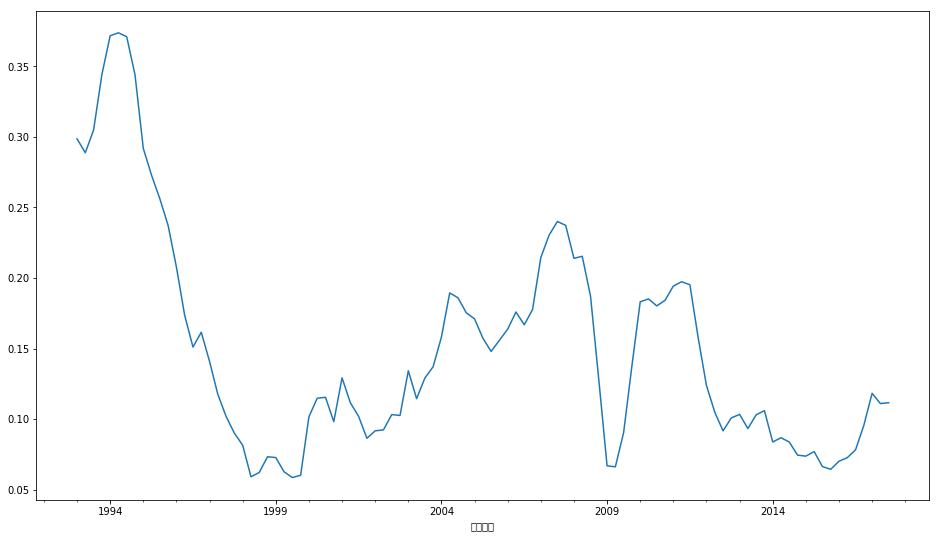

In [425]:
plt.figure(figsize=(16, 9))
df[df.columns[0]].pct_change(periods=4).plot()
# df['stock'].plot()
# df['commodity'].plot()

# 标准化

In [20]:
X = pd.DataFrame(index=df.index, columns=df.columns)
for date in df.index:
    past = df[df.index <= date]
    X.loc[date] = (df.loc[date] - past.mean()) / past.std()
X = X.loc[X.index[24:]]

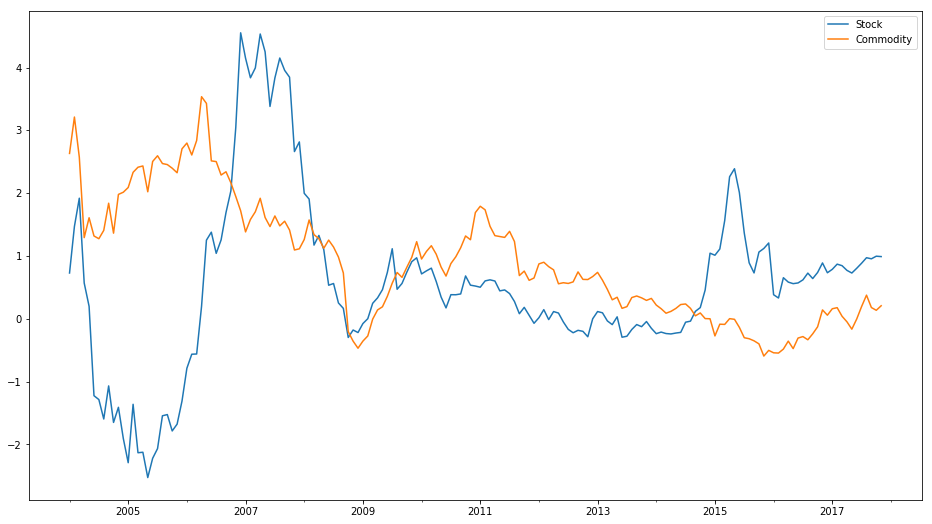

In [21]:
plt.figure(figsize=(16, 9))
X['stock'].plot(label='Stock')
X['commodity'].plot(label='Commodity')
plt.legend()

In [426]:
X = df.pct_change(periods=4)

In [427]:
X = X.replace([-np.inf, np.inf], np.nan).fillna(0)

In [428]:
X.shape

(103, 82)

In [429]:
Y = pd.Series(0, index=X.index)

In [430]:
# 价值股牛市
# Y[((Y.index >= '2015-01-01') & (Y.index <= '2015-06-30'))]\
#  = 1

In [431]:
# 周期股牛市
Y[((Y.index >= '2005-07-01') & (Y.index <= '2007-10-01'))] = 1
#   ((Y.index >= '2010-07-01') & (Y.index <= '2010-10-01'))]\
#  = 1

In [432]:
# 股票牛市
# Y[((Y.index >= '2007-01-01') & (Y.index <= '2007-10-01')) |
#   ((Y.index >= '2014-01-01') & (Y.index <= '2015-06-01'))]\
#  = 1

In [433]:
# 股票行情
# Y[df['stock'].pct_change() > 0.05] = 1
# 股票行情前一个月
# Y = Y.shift(-1)
# Y.iloc[-1] = 0

In [434]:
Y[Y == 1].sum()

9

# 度量学习

In [435]:
now = '2018-01-01'

In [436]:
# setting up LMNN
lmnn = metric_learn.LMNN(k=5, learn_rate=1e-6)

In [437]:
# fit the data!
lmnn.fit(X[X.index <= now].astype('float64').as_matrix(), Y[Y.index <= now].as_matrix())

In [438]:
# transform our input space
X_lmnn = lmnn.transform()

In [439]:
X_lmnn = pd.DataFrame(X_lmnn, index=X[X.index <= now].index)

In [440]:
scenario = X_lmnn[Y == 1]
center = scenario.mean()
distance = pd.Series(index = Y[Y.index <= now].index)
for index in X_lmnn.index:
    x = X_lmnn.loc[index]
    distance.loc[index] = euclidean(x, center)

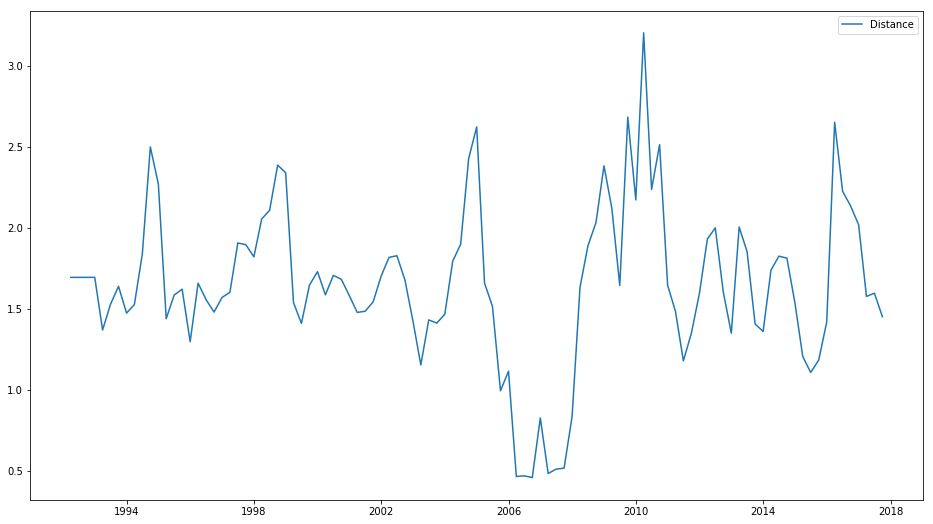

In [441]:
plt.figure(figsize=(16, 9))
# plt.plot(X['commodity'], label='Commodity')
# plt.plot(X['stock'], label='Stock')
plt.plot(distance[distance.index <= now], label='Distance')
plt.legend()
# distance.diff().astype('float').corr(df['stock'].pct_change().shift(-1).astype('float'), method='spearman')

# 有监督分类

In [272]:
Y = pd.Series(0, index=X.index)
# 商品价格上涨超过5%的月份的前一个月
Y[df['commodity'].pct_change() > 0] = 1
Y = Y.shift(-1)
Y.iloc[-1] = 0

In [273]:
Y.shape

(167L,)

In [274]:
Y[Y == 1].shape

(92L,)

In [275]:
1.0 * (Y.shape[0] - Y[Y == 1].shape[0]) / Y.shape[0]

0.4491017964071856

In [276]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn import svm

In [285]:
clf = svm.SVC(kernel='linear', C=0.01, probability=True)

In [286]:
scores = cross_val_score(clf, X, Y, cv=10)

In [287]:
scores

array([ 0.61111111,  0.55555556,  0.17647059,  0.23529412,  0.41176471,
        0.5625    ,  0.625     ,  0.9375    ,  0.375     ,  0.8125    ])

In [288]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.53 (+/- 0.45)


In [179]:
predict = cross_val_predict(clf, X_train, Y_train, cv=10)

In [180]:
accuracy_score(predict, Y_train)

0.91666666666666663

In [189]:
clf.fit(X_train, Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

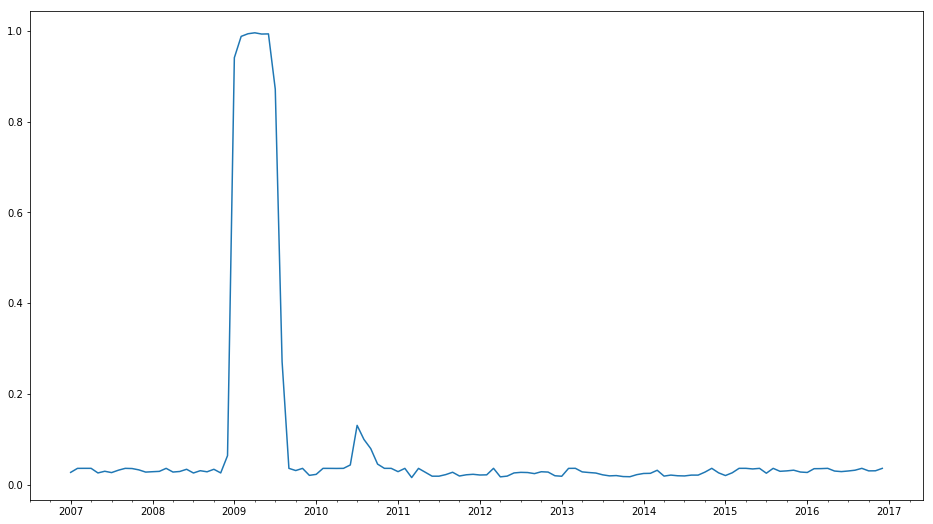

In [197]:
plt.figure(figsize=(16, 9))
pd.Series(clf.predict_proba(X_train)[:, 1], index=X_train.index).plot()

In [191]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)